## 라이브러리 설치
- opencv-python 라이브러리 설치

In [1]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import cv2
import numpy as np

print(cv2.__version__)
print(np.__version__)

4.6.0
1.21.6


## 구글 드라이브 연동

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/산대특/data'
print(DATA_PATH)

/content/drive/MyDrive/Colab Notebooks/산대특/data


## 데이터 불러오기
- swiss-army-ant.jpg 파일 읽기

In [8]:
%matplotlib inline

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread(DATA_PATH + '/ants/swiss-army-ant.jpg')
print(img.shape)

(261, 280, 3)


- (261, 280, 3)
  + 3 : 컬러 채널 수 (RGB)
  + 세로 261, 가로 280, 채널 3

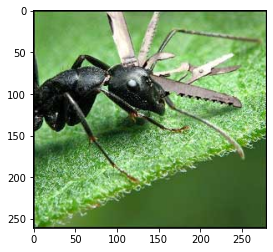

In [11]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [14]:
# 이미지의 픽셀 값 확인
print(img[:3])

[[[ 60   4  33]
  [ 28   0  10]
  [ 12   7   9]
  ...
  [  4   2   0]
  [ 13   0   2]
  [ 17   0   4]]

 [[ 28   0  10]
  [ 16   0   6]
  [ 21  33  27]
  ...
  [ 15  27  15]
  [ 19  18  14]
  [  4   0   0]]

 [[ 18  12  17]
  [ 24  35  32]
  [ 92 139 117]
  ...
  [127 165 143]
  [ 99 124 110]
  [ 11  33  21]]]


- 이미지의 배열 사이즈 확인

In [15]:
print(len(img)) # 세로 사이즈
print(len(img[0])) # 가로 사이즈
print(len(img[0][0])) # 컬러 채널

261
280
3


## 픽셀값의 이미지를 데이터 프레임으로 변환

In [17]:
import pandas as pd 

# 픽셀 배열을 B, G, R별로 분할
b, g, r = cv2.split(img)

# B배열을 데이터 프레임형식으로 전환
b_df = pd.DataFrame(b)

# 데이터 사이즈의 확인
print(b_df.shape) 
b_df.head()

(261, 280)


,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,60,28,12,0,0,0,1,0,0,0,...,2,0,0,6,0,0,0,4,13,17
1,28,16,21,0,0,0,0,0,0,0,...,1,0,0,0,0,2,12,15,19,4
2,18,24,92,81,83,69,86,89,89,85,...,116,113,119,115,107,120,125,127,99,11
3,0,0,82,77,74,60,75,78,72,71,...,109,108,107,97,96,110,116,130,92,0
4,0,0,84,75,66,55,67,69,70,68,...,96,94,93,87,90,102,109,135,105,0


## 그레이스케일 이미지
- RGB컬러를 밝기의 정도만으로 표현

(261, 280)


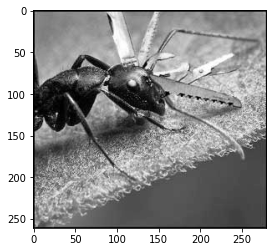

In [19]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 이미지 사이즈 확인
print(gray_img.shape)

# 이미지 표시 
plt.imshow(gray_img, cmap = 'gray') 
plt.show()

In [21]:
# 연습문제 2 : 이미지의 픽셀값을 확인
print(gray_img)

[[ 19   6   8 ...   2   2   3]
 [  6   4  30 ...  22  17   0]
 [ 14  33 127 ... 154 117  27]
 ...
 [  6  22 116 ...  72  54   6]
 [  8  19 134 ...  58  53   9]
 [  1   2  41 ...  17  19   0]]


In [22]:
# 연습문제 3 : 이미지의 배열 사이즈 확인 
# 세로 사이즈 
print(len(gray_img))

# 가로 사이즈
print(len(gray_img[0]))

261
280


- 데이터 프레임 형식으로 표시해서 확인

In [23]:
gr_df = pd.DataFrame(gray_img)
print(gr_df.shape)
gr_df.head()

(261, 280)


,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,19,6,8,3,8,6,9,3,5,5,...,1,1,2,13,4,4,2,2,2,3
1,6,4,30,14,21,11,12,6,12,12,...,10,9,6,12,9,18,24,22,17,0
2,14,33,127,131,138,122,130,130,130,129,...,146,145,153,150,144,155,157,154,117,27
3,3,16,132,143,145,129,135,135,129,129,...,152,152,153,145,144,158,159,167,122,6
4,6,22,139,146,144,131,133,131,134,134,...,144,144,143,138,141,153,155,176,139,14


## 이진화 (Binarization) 이미지
- 경계값을 투입
- 픽셀값이 경계값보다 크면 백(255)을 주고, 경계값보다 작으면 흑(0)으로 주어 흑백 이미지로 변환
- 이미지 임계처리
- 키워드 : 오츠의 알고리즘 (Otsu's Method)


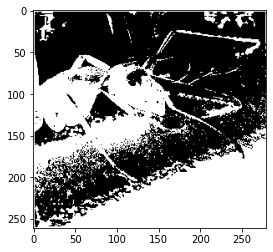

In [25]:
# ret, bin_img = cv2.threshold(gray_img, 128, 255, cv2.THRESH_BINARY) 
ret, bin_img = cv2.threshold(gray_img, 128, 255, cv2.THRESH_BINARY_INV) 

# 이미지 표시 
plt.imshow(bin_img, cmap = 'gray')
plt.show()

In [26]:
bin_df = pd.DataFrame(bin_img)
print(bin_img.shape)
bin_df.head()

(261, 280)


,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,255,255,255,0,0,255,0,0,0,0,...,0,0,0,0,0,0,0,0,255,255
3,255,255,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,255,255
4,255,255,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,255


## Why 이미지 조작을 할까? 
- 학습
- 데이터 절대적으로 부족
- 주어진 데이터 가지고 시뮬레이션 

## 다량의 데이터 수집


In [28]:
# 이미지 폴더 지정
import os 
import cv2 
import numpy as np 

# 이미지 폴더 지정 
dirs = ['ants', 'bees']

# 이미지의 픽셀값과 레이블을 보전하기 위한 리스트 생성 
pixels = [] # 설명변수
labels = [] # 목적변수 

print(DATA_PATH)
print("/content/drive/MyDrive/Colab Notebooks/산대특/data/ants")

/content/drive/MyDrive/Colab Notebooks/산대특/data
/content/drive/MyDrive/Colab Notebooks/산대특/data/ants


In [36]:
from pandas.core.groupby.generic import DataFrameGroupBy
for i, d in enumerate(dirs):
  
  # 파일명을 취득
  files = os.listdir(DATA_PATH + '/' + d)
  
  for f in files:

    # 이미지를 그레이 스케일로 READ
    img = cv2.imread(DATA_PATH + '/' + d + '/' + f, 0)
    
    # 이미지 리사이징
    img = cv2.resize(img, (128, 128))

    # 픽셀값을 보전 
    img = np.array(img).flatten().tolist()
    pixels.append(img) 

    # 이미지의 Label을 리스트에 보존 
    labels.append(i)

In [40]:
# 픽셀값을 데이터 프레임 형식으로 변환
pixels_df = pd.DataFrame(pixels)
pixels_df = pixels_df / 255 # 정규화 

# Label을 데이터 프레임 형식으로 변환 
labels_df = pd.DataFrame(labels)
labels_df = labels_df.rename(columns = {0 : 'label'})

# 2개의 데이터 프레임을 수평결합
img_set = pd.concat([pixels_df, labels_df], axis = 1)
img_set.tail()

,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,label
152,0.505882,0.701961,0.631373,0.635294,0.584314,0.588235,0.615686,0.647059,0.705882,0.666667,...,0.368627,0.341176,0.341176,0.349020,0.396078,0.427451,0.501961,0.384314,0.349020,1
153,0.458824,0.462745,0.462745,0.435294,0.411765,0.400000,0.407843,0.419608,0.435294,0.447059,...,0.474510,0.447059,0.498039,0.572549,0.564706,0.466667,0.329412,0.188235,0.082353,1
154,0.650980,0.670588,0.674510,0.525490,0.741176,0.909804,0.929412,0.894118,0.878431,0.847059,...,0.200000,0.235294,0.266667,0.278431,0.301961,0.282353,0.286275,0.266667,0.270588,1
155,0.349020,0.341176,0.360784,0.380392,0.403922,0.443137,0.482353,0.505882,0.537255,0.572549,...,0.533333,0.560784,0.549020,0.725490,0.768627,0.780392,0.760784,0.847059,0.698039,1
156,0.925490,0.925490,0.925490,0.929412,0.925490,0.921569,0.917647,0.913725,0.898039,0.886275,...,0.733333,0.749020,0.709804,0.701961,0.721569,0.784314,0.815686,0.792157,0.800000,1


- 컬러 이미지의 설명변수와 목적변수의 세트를 작성하세요. 

In [42]:
pixels2 = [] # 설명변수
labels2 = [] # 목적변수

# r + g + b
tmp = [] 

for i, d in enumerate(dirs):
  
  # 파일명을 취득
  files = os.listdir(DATA_PATH + '/' + d)
  
  for f in files:

    # 이미지를 그레이 스케일로 READ
    img2 = cv2.imread(DATA_PATH + '/' + d + '/' + f)
    
    # 이미지 리사이징
    img2 = cv2.resize(img2, (128, 128))

    # 픽셀 배열을 B, G, R별로 분할
    b, g, r = cv2.split(img2)

    # 픽셀값을 보존
    b = np.array(b).flatten().tolist()
    g = np.array(g).flatten().tolist()
    r = np.array(r).flatten().tolist()

    tmp = b + g + r
    pixels2.append(tmp)

    # 이미지의 레이블을 리스트에 보존
    labels2.append(i) 

In [43]:
# 픽셀값을 데이터 프레임 형식으로 변환
pixels2_df = pd.DataFrame(pixels2)
pixels2_df = pixels2_df / 255 # 정규화 

# Label을 데이터 프레임 형식으로 변환 
labels2_df = pd.DataFrame(labels2)
labels2_df = labels2_df.rename(columns = {0 : 'label'})

# 2개의 데이터 프레임을 수평결합
img_set2 = pd.concat([pixels2_df, labels2_df], axis = 1)
img_set2.tail()

,0,1,2,3,4,5,6,7,8,9,...,49143,49144,49145,49146,49147,49148,49149,49150,49151,label
152,0.525490,0.698039,0.615686,0.627451,0.568627,0.603922,0.607843,0.662745,0.698039,0.694118,...,0.227451,0.207843,0.203922,0.192157,0.258824,0.274510,0.388235,0.352941,0.278431,1
153,0.011765,0.015686,0.058824,0.011765,0.000000,0.011765,0.003922,0.003922,0.007843,0.003922,...,0.529412,0.501961,0.611765,0.725490,0.725490,0.611765,0.466667,0.254902,0.086275,1
154,0.898039,0.917647,0.901961,0.694118,0.882353,0.996078,0.980392,0.996078,0.992157,0.988235,...,0.156863,0.168627,0.184314,0.192157,0.203922,0.184314,0.180392,0.164706,0.176471,1
155,0.215686,0.207843,0.223529,0.243137,0.266667,0.301961,0.341176,0.352941,0.388235,0.415686,...,0.631373,0.670588,0.650980,0.819608,0.831373,0.815686,0.784314,0.862745,0.717647,1
156,0.376471,0.360784,0.372549,0.360784,0.360784,0.294118,0.266667,0.243137,0.184314,0.145098,...,0.968627,0.980392,0.960784,0.949020,0.960784,0.996078,1.000000,0.988235,0.996078,1


## 모폴로지 변환
- 이진화 이미지를 대상으로 압축(Erosion), 팽창(Dilation), 오프닝, 클로징

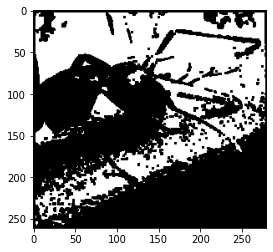

In [45]:
img = cv2.imread(DATA_PATH + '/ants/swiss-army-ant.jpg', 0)

# 이진화 이미지로 변환 
ret, bin_img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

# 이미지 압축
kernel = np.ones((3, 3), np.uint8) # 데이터 타입
img_el = cv2.erode(bin_img, kernel, iterations = 1)
plt.imshow(img_el, cmap = 'gray')

- 이진화 이미지의 팽창

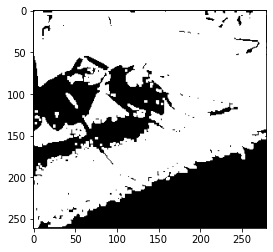

In [46]:
img_dl = cv2.dilate(bin_img, kernel, iterations = 1)
plt.imshow(img_dl, cmap='gray')

- 히스토그램 작성

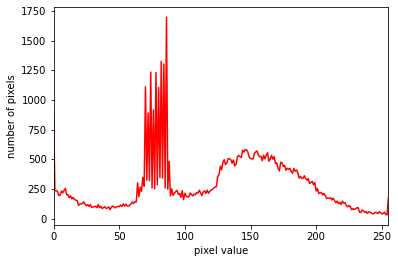

In [47]:
hist_gr, bins = np.histogram(img.ravel(), 256, [0, 256])

# 히스토그램
plt.xlim(0, 255)
plt.plot(hist_gr, '-r')
plt.xlabel('pixel value')
plt.ylabel('number of pixels')
plt.show()

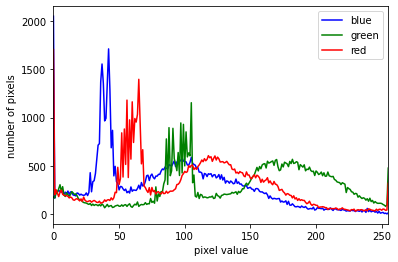

In [50]:
# 연습문제 5
# 컬러 이미지의 히스토그램을 한번 그려보세요
img = cv2.imread(DATA_PATH + '/ants/swiss-army-ant.jpg')

b, g, r = img[:, :, 0], img[:, :, 1], img[:, :, 2]

hist_b, bins = np.histogram(b.ravel(), 256, [0, 256])
hist_g, bins = np.histogram(g.ravel(), 256, [0, 256])
hist_r, bins = np.histogram(r.ravel(), 256, [0, 256])

# 히스토그램
plt.xlim(0, 255)
plt.plot(hist_b, '-b', label = 'blue')
plt.plot(hist_g, '-g', label = 'green')
plt.plot(hist_r, '-r', label = 'red')
plt.xlabel('pixel value')
plt.ylabel('number of pixels')
plt.legend()
plt.show()

## PCA에 의한 차원압축

71


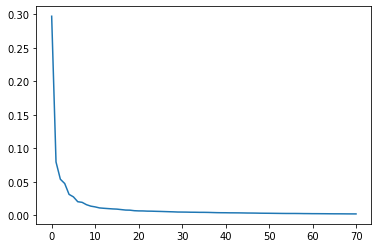

In [65]:
from sklearn.decomposition import PCA

# 주성분분석의 누적 기여율 80%까지 추출
pca = PCA(0.90) 
pixels_pca = pca.fit_transform(pixels_df)

# 주성분 확인
print(pca.n_components_)
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [66]:
pixels_pca.shape

(157, 71)

In [67]:
# labels_df.shape
img_set_pca = pd.concat([pd.DataFrame(pixels_pca), labels_df], axis = 1)
img_set_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,label
0,8.445754,-1.709419,-0.421608,2.517579,-1.105137,-0.654897,-1.654017,-0.333829,0.008526,1.586907,...,-0.546529,-0.242125,0.088913,-0.149201,-0.747098,0.723276,-0.053910,0.190922,-1.016064,0
1,22.553406,0.892704,-3.901053,4.247389,1.494441,1.140901,-0.684836,1.880959,-1.509893,0.144310,...,-0.286633,-0.662796,0.421177,-0.403646,0.014076,-0.140644,1.215396,0.573739,-0.421975,0
2,4.719826,3.553778,-5.359149,-4.429213,-4.033364,-0.280711,-3.219890,3.847842,2.033417,1.184202,...,-0.842669,-1.077102,-0.912899,-1.302545,-1.307975,0.091143,-1.450092,-0.629190,-0.840959,0
3,-6.692734,3.281745,-3.925493,-8.276016,-8.275230,4.491019,-2.694464,-4.757513,7.973953,1.950910,...,0.329591,-1.783686,1.707791,1.036709,-0.791120,1.664822,0.651664,-0.333151,-0.630860,0
4,44.162086,-1.533017,21.786136,7.986306,5.951209,-15.962198,1.234173,10.440050,14.459712,-1.305286,...,0.423803,-1.973789,1.144847,-1.142125,-2.395093,0.427069,-2.364947,-1.215801,3.501808,0


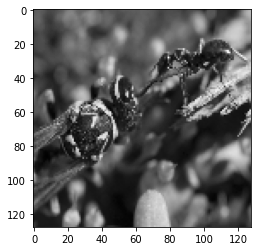

In [68]:
plt.imshow(np.array(pixels_df)[30].reshape(128, 128), cmap = 'gray')
plt.show()

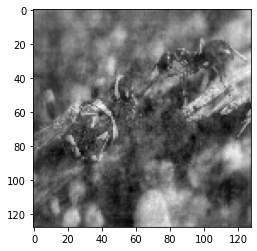

In [69]:
pixels_low = pca.inverse_transform(pixels_pca)
plt.imshow(pixels_low[30].reshape(128, 128), cmap = 'gray')

=- 